# Conditional Markov Bridge (CMB) for mixed data

### Dataset: 8-gaussians to 2 moons
- continuous: positions in (x,y)-plane
- discrete: 8 position-dependent states 

/home/df630/CMB/src/cmb/datasets/toys.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return positions * 3 - 1, torch.tensor(labels, dtype=torch.long)
/home/df630/CMB/src/cmb/datasets/toys.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return positions, torch.tensor(labels, dtype=torch.long)


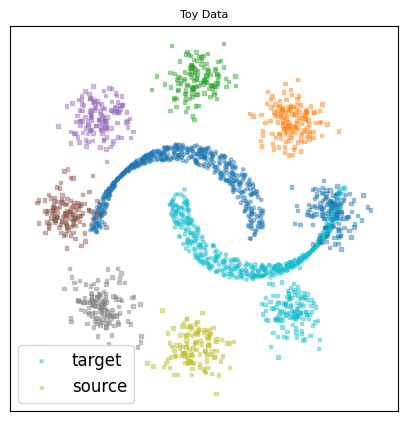

In [1]:
import matplotlib.pyplot as plt
from cmb.configs.experiments import Configs
from cmb.datasets.toys import SampleCoupling

config = Configs('configs.yaml')
toys = SampleCoupling(config=config.data)

_, ax = plt.subplots(1, 1, figsize=(5,5)) 

toys.target.display(num_points=1000, s=6, cmap='tab10', alpha=0.4, ax=ax, label='target')
toys.source.display(num_points=1000, s=6, marker='s', cmap='tab10', alpha=0.4, ax=ax, label='source')

plt.legend(fontsize=12)
plt.title('Toy Data', fontsize=8)
plt.show()

In [2]:
from cmb.dynamics.cmb import ConditionalMarkovBridge, OTCMB, SBCMB
from cmb.models.architectures.deep_nets import HybridMLP
from cmb.models.trainers import CMBTrainer

dynamics = ConditionalMarkovBridge(config)
mlp = HybridMLP(config)
model = CMBTrainer(config, dynamics, mlp, toys)
model.train()

2024-09-22 16:02:25.359773: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-22 16:02:25.403382: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-22 16:02:25.404102: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 16:02:26.143818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: building dataloaders...
INFO: train/val/test split ratios: 1.0/0.0/0.0
INFO: train size: 70000, validation size: 0, testing sizes: 0


number of training parameters: 41034
start training...


epochs:   0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
from cmb.models.pipelines import Pipeline

pipeline = Pipeline(config, model, dynamics)
test = SampleCoupling(config=config.data)
pipeline.generate_samples(source_continuous=test.source.continuous, source_discrete=test.source.discrete.unsqueeze(1))


/home/df630/CMB/experiments/gaussians/utils.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax[j].scatter(paths[0, :N, 0], paths[0, :N, 1], s=1, color='gray', alpha=0.2, vmin=vmin, vmax=vmax)


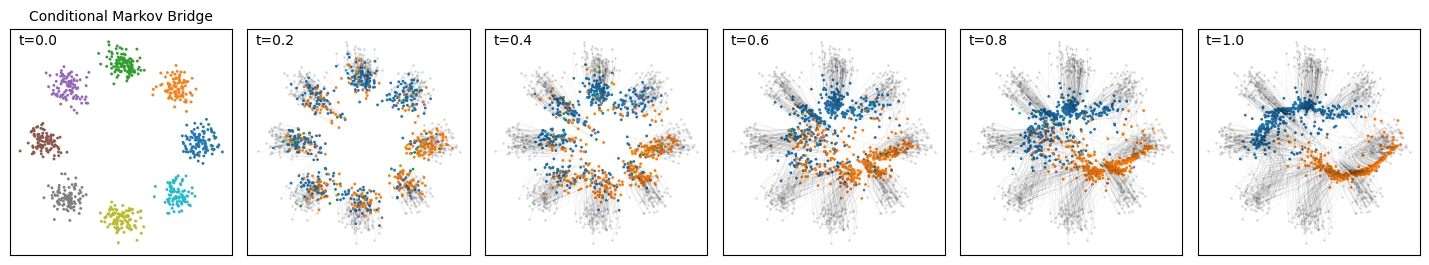

In [5]:
from utils import plot_trajectories

plot_trajectories(pipeline.paths, 
                  pipeline.jumps, 
                  title='Conditional Markov Bridge', 
                  N=800, 
                  show_paths=True)

### CMB: 
- $q(x_0, x_1)=q_0(x_0)\cdot q_1(x_1)$
- $q(k_0, k_1)=q_0(k_0)\cdot q_1(k_1)$
- $\lambda=3.0$
- $\gamma=0.125$ 
- $\sigma_{CFM}=0.1$


/tmp/ipykernel_1491123/989848761.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax[j].scatter(paths[0, :N, 0], paths[0, :N, 1], s=1, color='gray', alpha=0.2, vmin=vmin, vmax=vmax)


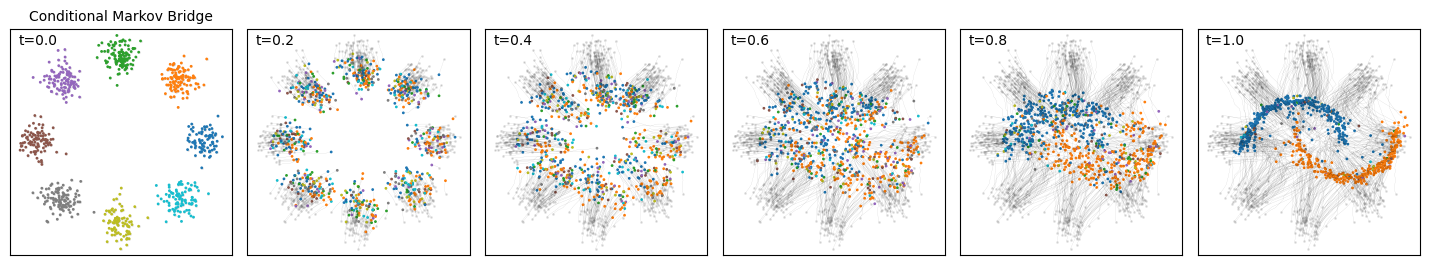

In [35]:
from utils import plot_trajectories

plot_trajectories(pipeline.paths, 
                  pipeline.jumps, 
                  title='Conditional Markov Bridge', 
                  N=800, 
                  show_paths=True)

- $q(x_0, x_1)=q_0(x_0)\cdot q_1(x_1)$
- $q(k_0, k_1)=q_0(k_0)\cdot q_1(k_1)$
- $\lambda=1.0$
- $\gamma=10^{-2}$ 
- $\sigma_{CFM}=10^{-5}$


/home/df630/CMB/experiments/gaussians/utils.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax[j].scatter(paths[0, :N, 0], paths[0, :N, 1], s=1, color='gray', alpha=0.2, vmin=vmin, vmax=vmax)


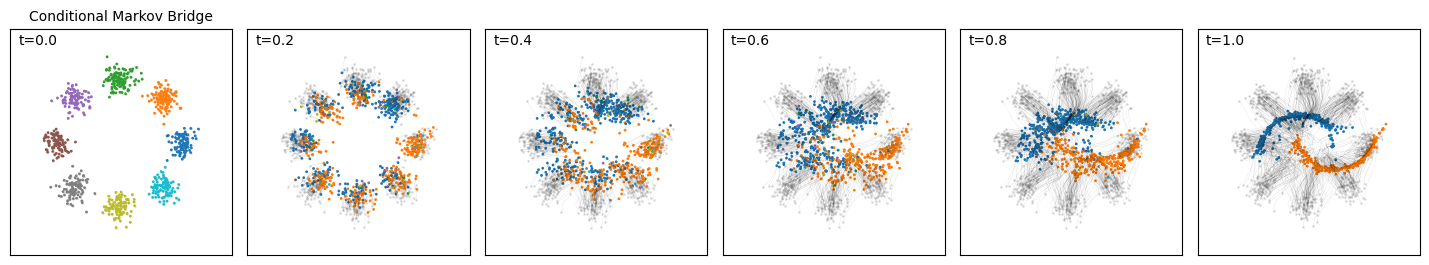

In [4]:
from utils import plot_trajectories

plot_trajectories(pipeline.paths, 
                  pipeline.jumps, 
                  title='Conditional Markov Bridge', 
                  N=800, 
                  show_paths=True)

- $q(x_0, x_1)=q_0(x_0)\cdot q_1(x_1)$
- $q(k_0, k_1)=q_0(k_0)\cdot q_1(k_1)$
- $\lambda=3.0$
- $\gamma=10^{-3}$ 
- $\sigma_{CFM}=10^{-5}$


/home/df630/CMB/experiments/gaussians/utils.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax[j].scatter(paths[0, :N, 0], paths[0, :N, 1], s=1, color='gray', alpha=0.2, vmin=vmin, vmax=vmax)


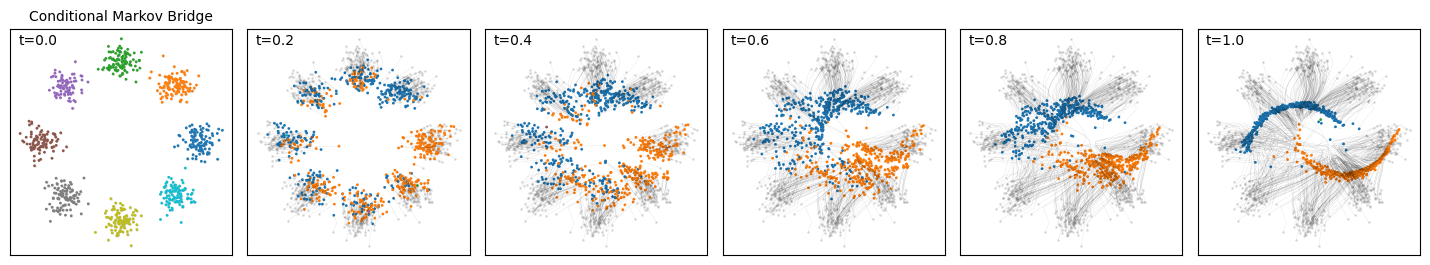

In [4]:
from utils import plot_trajectories

plot_trajectories(pipeline.paths, 
                  pipeline.jumps, 
                  title='Conditional Markov Bridge', 
                  N=800, 
                  show_paths=True)

### Batch OT-CMB:

- $q(x_0, x_1)=\pi_{\rm OT}(x_0 ,x_1)$
- $q(k_0, k_1)=q_0(k_0)\cdot q_1(k_1)$
- $\gamma=0.125$ 
- $\sigma_{CFM}=0.1$
- $\lambda=3.0$

/tmp/ipykernel_1520770/989848761.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax[j].scatter(paths[0, :N, 0], paths[0, :N, 1], s=1, color='gray', alpha=0.2, vmin=vmin, vmax=vmax)


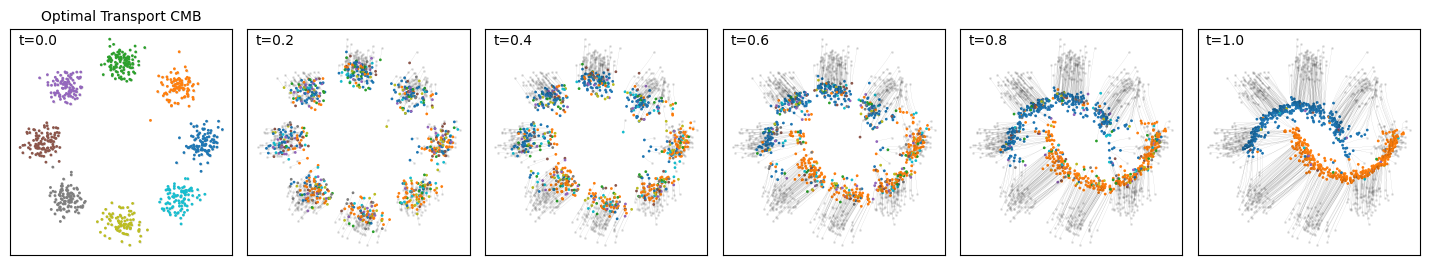

In [6]:
from utils import plot_trajectories

plot_trajectories(pipeline.paths, 
                  pipeline.jumps, 
                  title='Optimal Transport CMB', 
                  N=800, 
                  show_paths=True)

/home/df630/CMB/experiments/gaussians/utils.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax[j].scatter(paths[0, :N, 0], paths[0, :N, 1], s=1, color='gray', alpha=0.2, vmin=vmin, vmax=vmax)


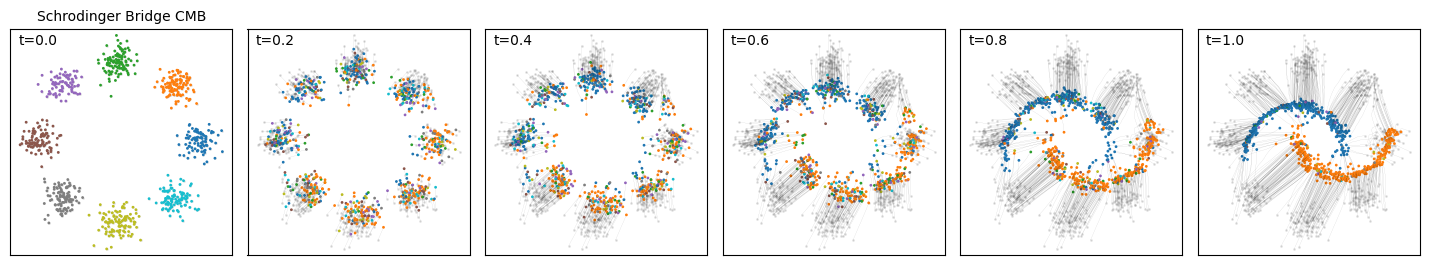

In [4]:
from utils import plot_trajectories

plot_trajectories(pipeline.paths, 
                  pipeline.jumps, 
                  title='Schrodinger Bridge CMB', 
                  N=800, 
                  show_paths=True)

In [5]:
from utils import animate_trajectories
animate_trajectories(pipeline.paths, pipeline.jumps, N=200, cmap='tab10', show_paths=True, filename='trajectories.gif', fps=10)


/home/df630/CMB/experiments/gaussians/utils.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  scatter_current = ax.scatter([], [], s=2, cmap=cmap, norm=norm)


Animation saved as trajectories.gif
